<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/Election-Prediction/2020_BiharElections/IndividualParties/BJP1Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 141 (delta 44), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (141/141), 16.70 MiB | 17.76 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [ ]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler

consumer_key= "DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret  = "jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"
access_token ="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret= "cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
# authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-10-28"
date2 = "2020-11-09"


text = []


def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2).items():
        print(tweet.text)
        text.append(tweet.text)
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"#amitshah bjp")  
           
data1 = list(zip(text))
df1 = pd.DataFrame(data =data1, columns =["Tweet"])

df1.to_csv('bjp11.csv') 


Streaming output truncated to the last 5000 lines.
<--------------------------------------------------->
433
RT @MJALSHRIKA: This is the Arabs' direct message to the leaders of the terrorist Hindutva outfits RSS,BJP, VHP, Bajrang Dal and ABVP, eith…
<--------------------------------------------------->
434
RT @MJALSHRIKA: This is the Arabs' direct message to the leaders of the terrorist Hindutva outfits RSS,BJP, VHP, Bajrang Dal and ABVP, eith…
<--------------------------------------------------->
435
#AmitShah it’s a shame what Arnab Goswami has to go through. That too when BJP in centre. Imagine what wud happen i… https://t.co/aE5Iwx9IDB
<--------------------------------------------------->
436
RT @MJALSHRIKA: This is the Arabs' direct message to the leaders of the terrorist Hindutva outfits RSS,BJP, VHP, Bajrang Dal and ABVP, eith…
<--------------------------------------------------->
437
RT @MJALSHRIKA: This is the Arabs' direct message to the leaders of the terrorist Hindutva outf

# **Importing Libraries**

In [ ]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# **Cleaning** **BJPDataset1**

```
# length of the dataset11
```



In [ ]:
tweets_list = df1['Tweet'].tolist()
len(tweets_list)

1783

# Removing duplicate tweets if any

In [ ]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)

731

```
No of duplicate tweets
```

In [ ]:
df1['Tweet'].duplicated().sum()

1052

In [ ]:
df1 = df1.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df1.shape

(731, 1)

`Removed all the dupliactes`



# **Removing Emojis**


In [ ]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df1['Processed_Tweet']=df1.Tweet.apply(remove_emoji)

From now on, all the preprocessing & modelling on tweets will be stored in the data column called 'Processed_Tweet'

In [ ]:
count = 0
for i in df1['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df1.drop(df1.loc[df1['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

147

In [ ]:
df1.shape

(584, 2)

In [ ]:
df1['Processed_Tweet']

1      We need leadership change immediately #pmofind...
2      #thooktahaibharat on BJP, #NarendraModi ,#Amit...
3      Beat it so much that #ArnabGoswamy should neve...
4      Extremely sad to see the condition of this cou...
5      #NarendraModi #AmitShah #YogiAdityanath #BJP M...
                             ...                        
726    Union Home Minister #AmitShah to hold a 45 min...
727    WEST BENGAL \nUnion Home Minister Amit Shah to...
728    @narendramodi Pls public  ko support karo baad...
729    #AmitShah #NarendraModi .\n\nDear Sir\nAs per ...
730    Wake up #BJP #Karyakartas!! If #AmitShah doesn...
Name: Processed_Tweet, Length: 584, dtype: object

# **Removing Username**

In [ ]:
df1['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df1['Processed_Tweet']] #remove usernames
df1['Processed_Tweet']

1      We need leadership change immediately #pmofind...
2      #thooktahaibharat on BJP, #NarendraModi ,#Amit...
3      Beat it so much that #ArnabGoswamy should neve...
4      Extremely sad to see the condition of this cou...
5      #NarendraModi #AmitShah #YogiAdityanath #BJP M...
                             ...                        
726    Union Home Minister #AmitShah to hold a 45 min...
727    WEST BENGAL \nUnion Home Minister Amit Shah to...
728      Pls public  ko support karo baad vote mango ...
729    #AmitShah #NarendraModi .\n\nDear Sir\nAs per ...
730    Wake up #BJP #Karyakartas!! If #AmitShah doesn...
Name: Processed_Tweet, Length: 584, dtype: object

# **Removing URL if any**

In [ ]:
df1['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df1['Processed_Tweet']] #Remove urls
df1['Processed_Tweet']

1      We need leadership change immediately #pmofind...
2      #thooktahaibharat on BJP, #NarendraModi ,#Amit...
3      Beat it so much that #ArnabGoswamy should neve...
4      Extremely sad to see the condition of this cou...
5      #NarendraModi #AmitShah #YogiAdityanath #BJP M...
                             ...                        
726    Union Home Minister #AmitShah to hold a 45 min...
727    WEST BENGAL \nUnion Home Minister Amit Shah to...
728      Pls public  ko support karo baad vote mango ...
729    #AmitShah #NarendraModi .\n\nDear Sir\nAs per ...
730    Wake up #BJP #Karyakartas!! If #AmitShah doesn...
Name: Processed_Tweet, Length: 584, dtype: object

# **Removing Hashtags but keeping the word**

In [ ]:
df1['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df1['Processed_Tweet']] # remove the # in #hashtag
df1['Processed_Tweet']

1      We need leadership change immediately pmofindi...
2      thooktahaibharat on BJP, NarendraModi ,AmitSha...
3      Beat it so much that ArnabGoswamy should never...
4      Extremely sad to see the condition of this cou...
5      NarendraModi AmitShah YogiAdityanath BJP My  r...
                             ...                        
726    Union Home Minister AmitShah to hold a 45 minu...
727    WEST BENGAL \nUnion Home Minister Amit Shah to...
728      Pls public  ko support karo baad vote mango ...
729    AmitShah NarendraModi .\n\nDear Sir\nAs per re...
730    Wake up BJP Karyakartas!! If AmitShah doesn't ...
Name: Processed_Tweet, Length: 584, dtype: object

# **Using Preprocessor Library**

In [ ]:
!pip install preprocessor

In [ ]:
!pip install tweet-preprocessor

In [ ]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df1['Processed_Tweet'] = [p.clean(i) for i in df1['Processed_Tweet']]
df1['Processed_Tweet']

1      We need leadership change immediately pmofindi...
2      thooktahaibharat on BJP, NarendraModi ,AmitSha...
3      Beat it so much that ArnabGoswamy should never...
4      Extremely sad to see the condition of this cou...
5      NarendraModi AmitShah YogiAdityanath BJP My re...
                             ...                        
726    Union Home Minister AmitShah to hold a minute ...
727    WEST BENGAL Union Home Minister Amit Shah to t...
728    Pls public ko support karo baad vote mango ima...
729    AmitShah NarendraModi .Dear SirAs per recent r...
730    Wake up BJP Karyakartas!! If AmitShah doesn't ...
Name: Processed_Tweet, Length: 584, dtype: object

# **Removing any special characters, numbers, punctuations,etc..**

In [ ]:
df1.Processed_Tweet = df1.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df1["Processed_Tweet"]

1      We need leadership change immediately pmofindi...
2      thooktahaibharat on BJP  NarendraModi  AmitSha...
3      Beat it so much that ArnabGoswamy should never...
4      Extremely sad to see the condition of this cou...
5      NarendraModi AmitShah YogiAdityanath BJP My re...
                             ...                        
726    Union Home Minister AmitShah to hold a minute ...
727    WEST BENGAL Union Home Minister Amit Shah to t...
728    Pls public ko support karo baad vote mango ima...
729    AmitShah NarendraModi  Dear SirAs per recent r...
730    Wake up BJP Karyakartas   If AmitShah doesn t ...
Name: Processed_Tweet, Length: 584, dtype: object

# **Converting to lowercase**

In [ ]:
df1.Processed_Tweet = [low.lower() for low in df1.Processed_Tweet] #Converting into lower case
df1["Processed_Tweet"]

1      we need leadership change immediately pmofindi...
2      thooktahaibharat on bjp  narendramodi  amitsha...
3      beat it so much that arnabgoswamy should never...
4      extremely sad to see the condition of this cou...
5      narendramodi amitshah yogiadityanath bjp my re...
                             ...                        
726    union home minister amitshah to hold a minute ...
727    west bengal union home minister amit shah to t...
728    pls public ko support karo baad vote mango ima...
729    amitshah narendramodi  dear siras per recent r...
730    wake up bjp karyakartas   if amitshah doesn t ...
Name: Processed_Tweet, Length: 584, dtype: object

In [ ]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

**`We still have to remove stopwords, perform lemmatization & do stemming. So let us proceed with that`**

# **Removing Stop Words**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

["don't", 'only', 'it', 'wasn', 'o', 'under', 'then', 'do', 'were', 'again', 'm', "isn't", 'a', 'hasn', 'him', 'ourselves', 'when', 'from', 'off', 'those', 'what', 'against', 'most', 'can', 'their', 'them', 'once', 'won', 'where', 'ain', 'if', 'did', 'out', 'both', 'i', 'above', 'yours', 'which', 'an', 'by', 'am', 'no', "needn't", "you'll", 'all', 'haven', "wasn't", 'he', 'more', 'ours', 'hadn', 'and', 'how', 'until', 'hers', 'during', 'there', "couldn't", 'so', 's', "she's", 'here', 'my', 'our', "it's", 'been', "didn't", 'shan', 'between', 'she', 'had', 'just', 'such', 'was', 're', "mustn't", "shouldn't", 't', 'being', 'the', 'of', 'as', 'll', 'ma', 'its', 'be', 'they', 'before', 'your', 'further', "shan't", 'his', 'with', 'weren', "you'd", 'wouldn', 'that', 'nor', 'mustn', 'not', 'on', 'don', 'should', 'themselves', 'below', 'shouldn', 'than', 'these', 'too', 'very', "aren't", 'in', 'at', 'few', 'will', 'but', 'is', 'are', 'have', 'me', 'own', 'doing', 'about', "hadn't", 'after', 'wh

In [ ]:
df1['Processed_Tweet'] = df1.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df1['Processed_Tweet']

1      need leadership change immediately pmofindia c...
2      thooktahaibharat bjp narendramodi amitshah bjp...
3      beat much arnabgoswamy never betray people cou...
4      extremely sad see condition country bureucrats...
5      narendramodi amitshah yogiadityanath bjp reque...
                             ...                        
726    union home minister amitshah hold minute press...
727    west bengal union home minister amit shah tour...
728    pls public ko support karo baad vote mango ima...
729    amitshah narendramodi dear siras per recent re...
730         wake bjp karyakartas amitshah show good sign
Name: Processed_Tweet, Length: 584, dtype: object

# **Tokenizing**

In [ ]:
df1['Processed_Tweet'] = df1['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df1['Processed_Tweet']

1      [need, leadership, change, immediately, pmofin...
2      [thooktahaibharat, bjp, narendramodi, amitshah...
3      [beat, much, arnabgoswamy, never, betray, peop...
4      [extremely, sad, see, condition, country, bure...
5      [narendramodi, amitshah, yogiadityanath, bjp, ...
                             ...                        
726    [union, home, minister, amitshah, hold, minute...
727    [west, bengal, union, home, minister, amit, sh...
728    [pls, public, ko, support, karo, baad, vote, m...
729    [amitshah, narendramodi, dear, siras, per, rec...
730    [wake, bjp, karyakartas, amitshah, show, good,...
Name: Processed_Tweet, Length: 584, dtype: object

# **Stemming**

In [ ]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df1['Processed_Tweet'] = df1['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df1['Processed_Tweet']

1      [need, leadership, chang, immedi, pmofindia, c...
2      [thooktahaibharat, bjp, narendramodi, amitshah...
3      [beat, much, arnabgoswami, never, betray, peop...
4      [extrem, sad, see, condit, countri, bureucrat,...
5      [narendramodi, amitshah, yogiadityanath, bjp, ...
                             ...                        
726    [union, home, minist, amitshah, hold, minut, p...
727    [west, bengal, union, home, minist, amit, shah...
728    [pl, public, ko, support, karo, baad, vote, ma...
729    [amitshah, narendramodi, dear, sira, per, rece...
730    [wake, bjp, karyakarta, amitshah, show, good, ...
Name: Processed_Tweet, Length: 584, dtype: object

In [ ]:
df1['Processed_Tweet'] = df1.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df1

,Tweet,Processed_Tweet
1,We need leadership change immediately #pmofind...,"[need, leadership, chang, immedi, pmofindia, c..."
2,"#thooktahaibharat on BJP, #NarendraModi ,#Amit...","[thooktahaibharat, bjp, narendramodi, amitshah..."
3,Beat it so much that #ArnabGoswamy should neve...,"[beat, much, arnabgoswami, never, betray, peop..."
4,Extremely sad to see the condition of this cou...,"[extrem, sad, see, condit, countri, bureucrat,..."
5,#NarendraModi #AmitShah #YogiAdityanath #BJP M...,"[narendramodi, amitshah, yogiadityanath, bjp, ..."
...,...,...
726,Union Home Minister #AmitShah to hold a 45 min...,"[union, home, minist, amitshah, hold, minut, p..."
727,WEST BENGAL \nUnion Home Minister Amit Shah to...,"[west, bengal, union, home, minist, amit, shah..."
728,@narendramodi Pls public ko support karo baad...,"[public, support, karo, baad, vote, mango, ima..."
729,#AmitShah #NarendraModi .\n\nDear Sir\nAs per ...,"[amitshah, narendramodi, dear, sira, per, rece..."


In [ ]:
texts = []
texts = df1.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

5734

In [ ]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))

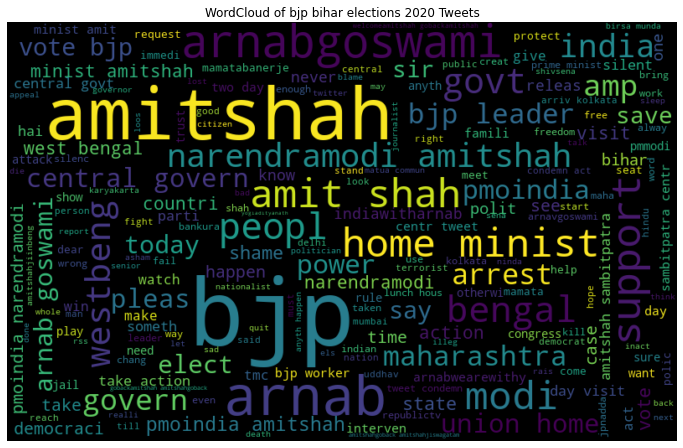

In [ ]:
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of bjp bihar elections 2020 Tweets")
plt.show()

# **Sentiment Analysis**




In [ ]:
from textblob import TextBlob

In [ ]:
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

584

In [ ]:
df1['Processed_Tweet']

1      [need, leadership, chang, immedi, pmofindia, c...
2      [thooktahaibharat, bjp, narendramodi, amitshah...
3      [beat, much, arnabgoswami, never, betray, peop...
4      [extrem, sad, see, condit, countri, bureucrat,...
5      [narendramodi, amitshah, yogiadityanath, bjp, ...
                             ...                        
726    [union, home, minist, amitshah, hold, minut, p...
727    [west, bengal, union, home, minist, amit, shah...
728    [public, support, karo, baad, vote, mango, ima...
729    [amitshah, narendramodi, dear, sira, per, rece...
730    [wake, bjp, karyakarta, amitshah, show, good, ...
Name: Processed_Tweet, Length: 584, dtype: object



```
**# Classifying tweets as neutral, positive, negative**
```




In [ ]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 125
Negative Tweets: 100
Neutral Tweets 359


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,Negative,Neutral,Positive,Compound
0,0.170,0.830,0.000,-0.3089
1,0.000,1.000,0.000,0.0000
2,0.000,0.728,0.272,0.5216
3,0.307,0.693,0.000,-0.4767
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
579,0.000,1.000,0.000,0.0000
580,0.000,1.000,0.000,0.0000
581,0.257,0.585,0.158,-0.1779
582,0.000,0.511,0.489,0.8225


In [ ]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.170,0.830,0.000,-0.3089,Negative
1,0.000,1.000,0.000,0.0000,Neutral
2,0.000,0.728,0.272,0.5216,Positive
3,0.307,0.693,0.000,-0.4767,Negative
4,0.000,1.000,0.000,0.0000,Neutral


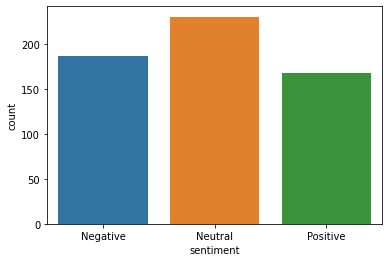

In [ ]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)